In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [2]:
parent = os.path.join(Path(os.getcwd()).parent)

sys.path.append(parent)

from utils.results import SimulationResults

In [3]:
p_drive = Path(r"p:\11210070-usgscoop-202324-arcticxb")

runs_folder = os.path.join(p_drive, "runs/")

RUNID = 'val1'

run_folder = os.path.join(runs_folder, f"{RUNID}/")

run = SimulationResults(RUNID)


ds0 = xr.load_dataset(os.path.join(run_folder, '0.nc'))
ds500 = xr.load_dataset(os.path.join(run_folder, '500.nc'))
ds1000 = xr.load_dataset(os.path.join(run_folder, '1000.nc'))
ds1500 = xr.load_dataset(os.path.join(run_folder, '1500.nc'))
ds2000 = xr.load_dataset(os.path.join(run_folder, '2000.nc'))


In [4]:
# air_temp = run.get_var_timeseries("2m_temperature")
# sea_temp = run.get_var_timeseries("sea_surface_temperature")

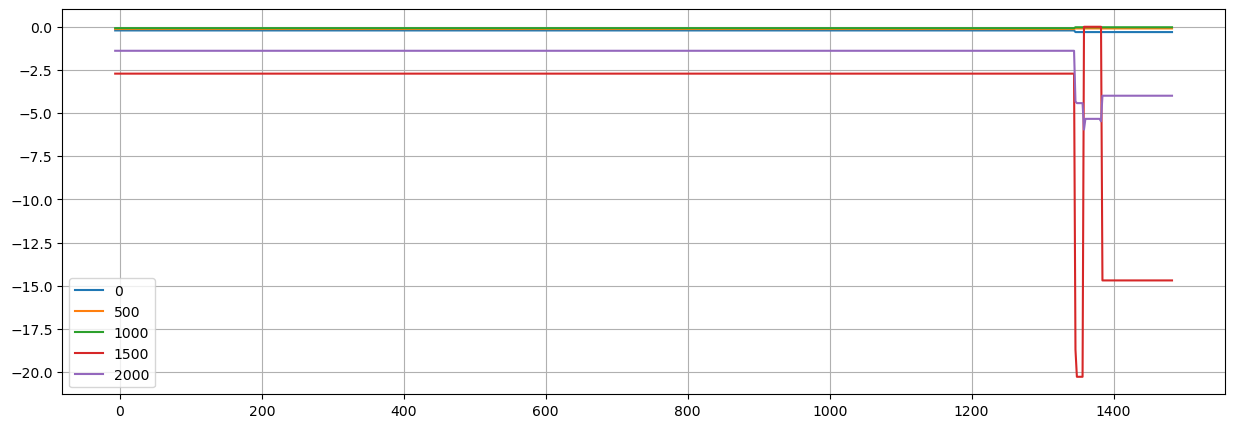

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds0.xgr, ds0.ground_temperature_distribution.values[:,15] - 273.15, label='0')
ax.plot(ds500.xgr, ds500.ground_temperature_distribution.values[:,15] - 273.15, label='500')
ax.plot(ds1000.xgr, ds1000.ground_temperature_distribution.values[:,15] - 273.15, label='1000')
ax.plot(ds1500.xgr, ds1500.ground_temperature_distribution.values[:,15] - 273.15, label='1500')
ax.plot(ds2000.xgr, ds2000.ground_temperature_distribution.values[:,15] - 273.15, label='2000')


ax.grid()
ax.legend()

In [6]:
cs = 4600000  # [J/K/m3]
cl = 7000000  # [J/K/m3]

ks = 1.5  # [W/m/K]
kl = 1  # [W/m/K]

rho_soil_particle = 2650  # [kg/m3]
nb = 0.6
L = 334000 # [J/kg]

rho_soil = 2650 * (1 - nb) + 1000 * nb
Cs = cs / rho_soil
Cl = cl / rho_soil

Tm = 273.15

T_range = np.linspace(250, 300, 100)

frozen_mask = (T_range < Tm)
unfrozen_mask = np.ones(frozen_mask.shape) - frozen_mask

In [7]:
h = frozen_mask * (T_range * Cs) + unfrozen_mask * (T_range * Cl + (Cs - Cl) * Tm + L * nb)

In [44]:
temp_borders = [
    Tm * Cs,
    Tm * Cs + L * nb
]

2771.0843373493976
4216.8674698795185
1399.5375441158599
2129.731045393727


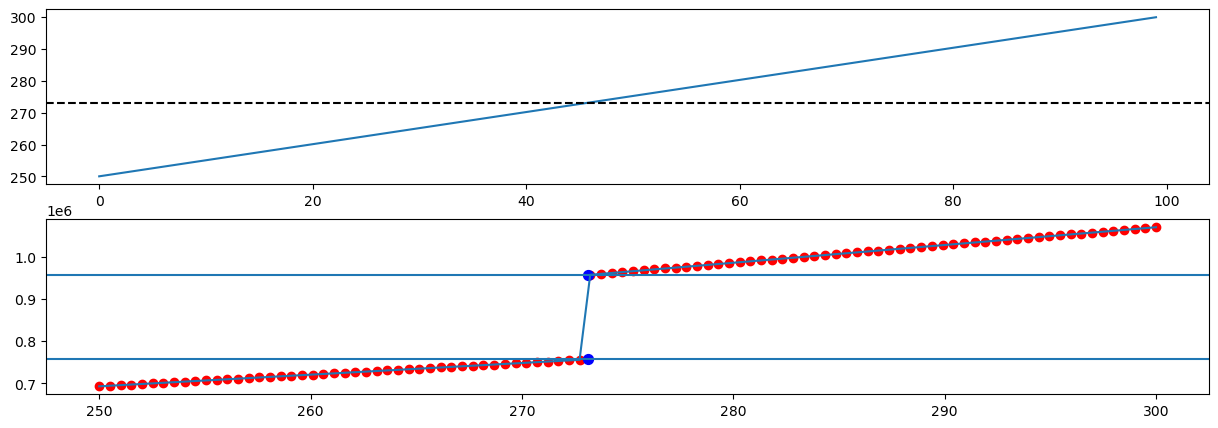

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(15,5))
ax1, ax2 = ax

ax1.plot(np.arange(len(T_range)), T_range)
ax1.axhline(Tm, 0, len(T_range), color='k', ls='--')

ax2.plot(T_range, h)
ax2.scatter(T_range, h, color='r')
ax2.scatter(Tm, Tm * Cs, color='b', s=50)
ax2.scatter(Tm, Tm * Cs + nb * L, color='b', s=50)
ax2.axhline(temp_borders[0]), ax2.axhline(temp_borders[1])

print(Cs)
print(Cl)

print(np.mean(np.gradient(h[:10])))
print(np.mean(np.gradient(h[90:])))

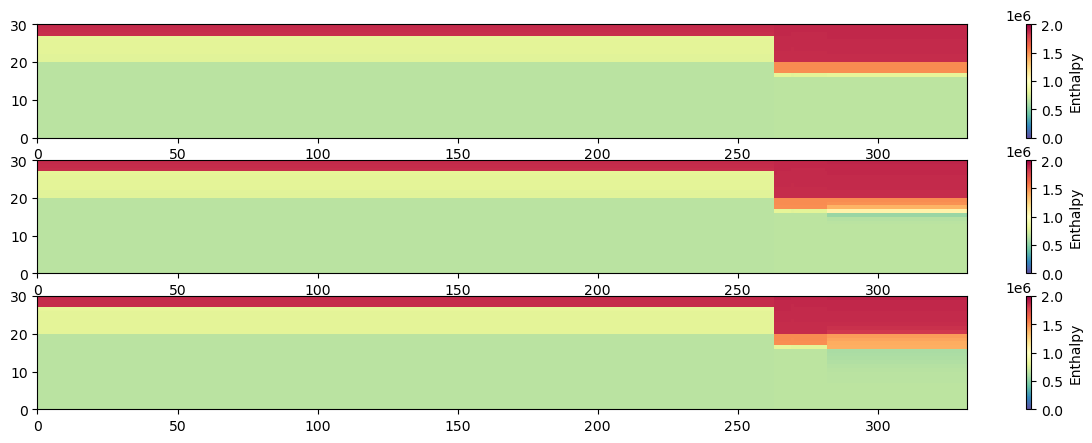

In [37]:
h1406 = run.get_var_timestep("ground_enthalpy_distribution", 1406)[:,::-1].T
h1410 = run.get_var_timestep("ground_enthalpy_distribution", 1410)[:,::-1].T
h1440 = run.get_var_timestep("ground_enthalpy_distribution", 1440)[:,::-1].T


fig, ax = plt.subplots(3, 1, figsize=(15,5))
ax1,ax2,ax3 = ax

psm1 = ax1.pcolormesh(h1406, cmap='Spectral_r', rasterized=True, vmin=0, vmax=2000000)
psm2 = ax2.pcolormesh(h1410, cmap='Spectral_r', rasterized=True, vmin=0, vmax=2000000)
psm3 = ax3.pcolormesh(h1440, cmap='Spectral_r', rasterized=True, vmin=0, vmax=2000000) 

plt.colorbar(psm1, ax=ax1, label='Enthalpy')
plt.colorbar(psm2, ax=ax2, label='Enthalpy')
plt.colorbar(psm3, ax=ax3, label='Enthalpy')


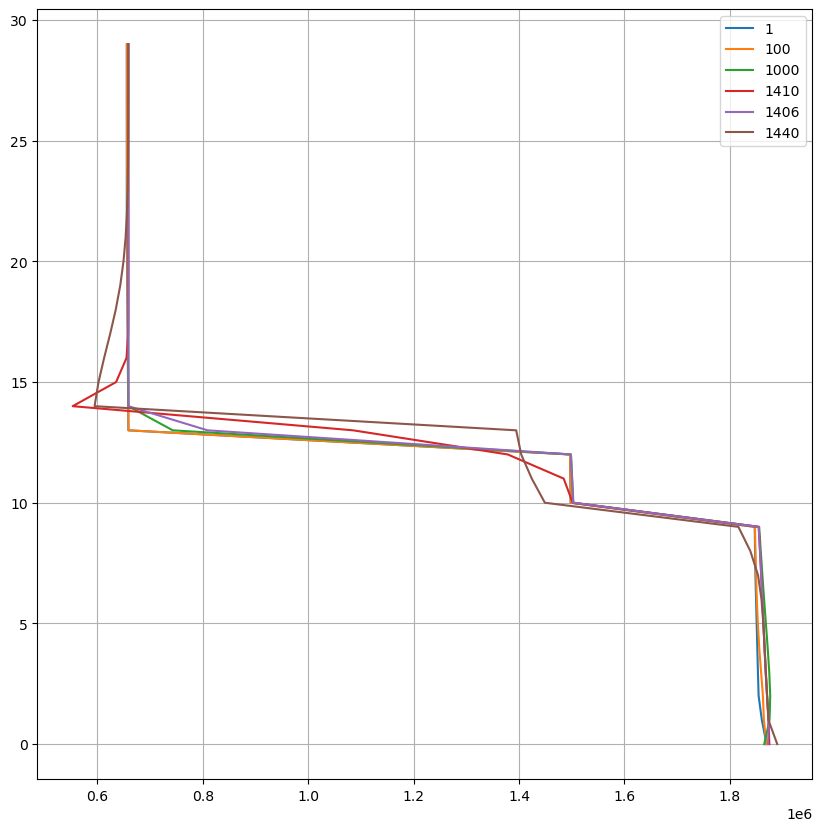

In [40]:
dp1 = run.get_var_timestep("ground_enthalpy_distribution", 1)[:,::-1].T[:,300]
dp100 = run.get_var_timestep("ground_enthalpy_distribution", 100)[:,::-1].T[:,300]
dp1000 = run.get_var_timestep("ground_enthalpy_distribution", 1000)[:,::-1].T[:,300]
dp1406 = h1406[:,300]
dp1410 = h1410[:,300]
dp1440 = h1440[:,300]

plt.figure(figsize=(10,10))

plt.plot(dp1[::-1], np.arange(len(dp1)), label=1)
plt.plot(dp100[::-1], np.arange(len(dp100)), label=100)
plt.plot(dp1000[::-1], np.arange(len(dp1000)), label=1000)
plt.plot(dp1410[::-1], np.arange(len(dp1410)), label=1410)
plt.plot(dp1406[::-1], np.arange(len(dp1406)), label=1406)

plt.plot(dp1440[::-1], np.arange(len(dp1440)), label=1440)

plt.legend()
plt.grid()

In [24]:
4600000 / 2000

2300.0

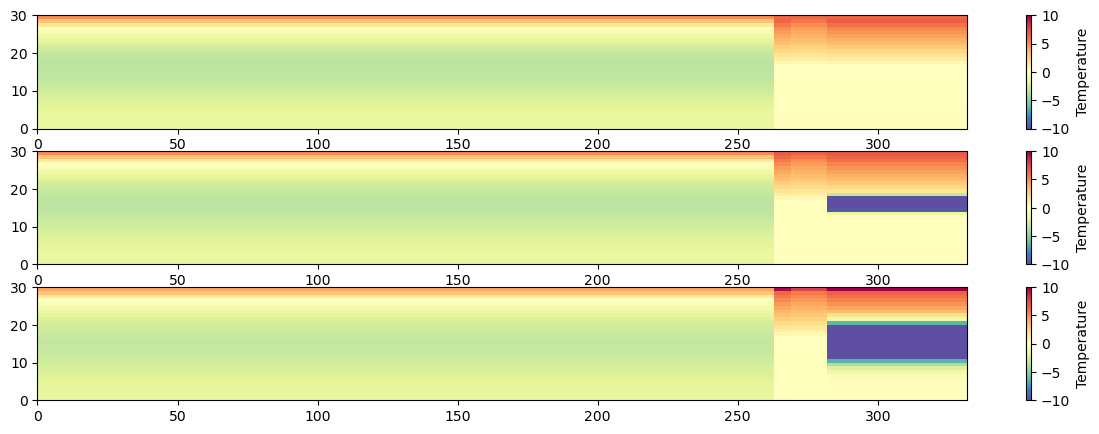

In [12]:
T1406 = run.get_var_timestep("ground_temperature_distribution", 1406)[:,::-1].T - 273.15
T1410 = run.get_var_timestep("ground_temperature_distribution", 1410)[:,::-1].T - 273.15
T1440 = run.get_var_timestep("ground_temperature_distribution", 1440)[:,::-1].T - 273.15

fig, ax = plt.subplots(3, 1, figsize=(15,5))
ax1,ax2,ax3 = ax

psm1 = ax1.pcolormesh(T1406, cmap='Spectral_r', rasterized=True, vmin=-10, vmax=10)
psm2 = ax2.pcolormesh(T1410, cmap='Spectral_r', rasterized=True, vmin=-10, vmax=10)
psm3 = ax3.pcolormesh(T1440, cmap='Spectral_r', rasterized=True, vmin=-10, vmax=10) 

plt.colorbar(psm1, ax=ax1, label='Temperature')
plt.colorbar(psm2, ax=ax2, label='Temperature')
plt.colorbar(psm3, ax=ax3, label='Temperature')

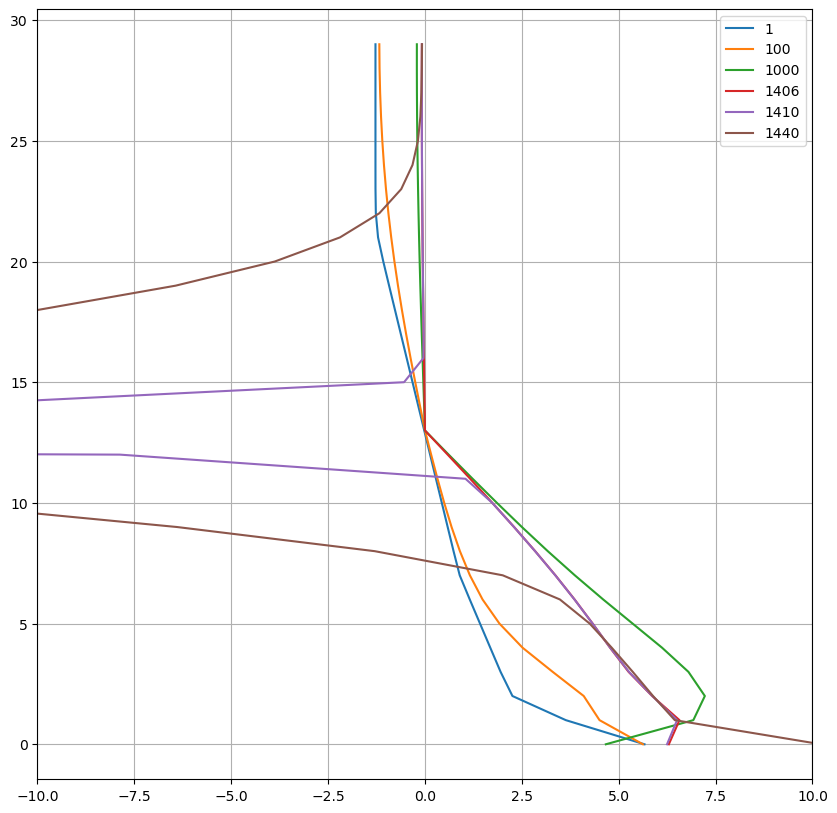

In [32]:
dp1 = run.get_var_timestep("ground_temperature_distribution", 1)[:,::-1].T[:,300] - 273.15
dp100 = run.get_var_timestep("ground_temperature_distribution", 100)[:,::-1].T[:,300] - 273.15
dp1000 = run.get_var_timestep("ground_temperature_distribution", 1000)[:,::-1].T[:,300] - 273.15
dp1406 = run.get_var_timestep("ground_temperature_distribution", 1406)[:,::-1].T[:,300] - 273.15
dp1410 = run.get_var_timestep("ground_temperature_distribution", 1408)[:,::-1].T[:,300] - 273.15
dp1440 = run.get_var_timestep("ground_temperature_distribution", 1440)[:,::-1].T[:,300] - 273.15

plt.figure(figsize=(10, 10))

plt.plot(dp1[::-1], np.arange(len(dp1)), label=1)
plt.plot(dp100[::-1], np.arange(len(dp100)), label=100)
plt.plot(dp1000[::-1], np.arange(len(dp1000)), label=1000)
plt.plot(dp1406[::-1], np.arange(len(dp1406)), label=1406)
plt.plot(dp1410[::-1], np.arange(len(dp1410)), label=1410)
plt.plot(dp1440[::-1], np.arange(len(dp1440)), label=1440)

plt.xlim((-10, 10))

plt.grid()
plt.legend()

In [34]:
int(30 * 1 / 3)

# self.config.thermal.grid_resolution * self.config.thermal.nb_switch_depth / self.config.thermal.max_depth

10

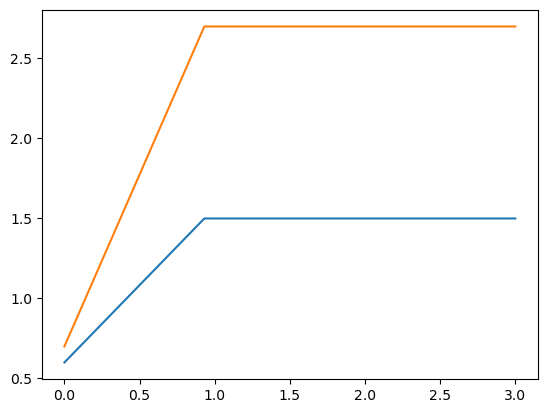

In [35]:


# initialize linear distribution of k, starting at min value and ending at max value (at a depth of 1m)
id_kmax = 10  # id of the grid point at which the maximum k should be reached
k_unfrozen_distr = np.append(
    np.linspace(0.6, 1.5, 10), np.ones(20) * 1.5)
k_frozen_distr = np.append(
    np.linspace(0.7, 2.7, 10), np.ones(20) * 2.7)

z = np.linspace(0, 3, 30)
# # initialize k-matrix
# self.k_matrix = frozen_mask * np.tile(self.k_frozen_distr, (len(xgr), 1)) + \
#                 unfrozen_mask * np.tile(self.k_unfrozen_distr, (len(xgr), 1))

plt.plot(z, k_unfrozen_distr)
plt.plot(z, k_frozen_distr)

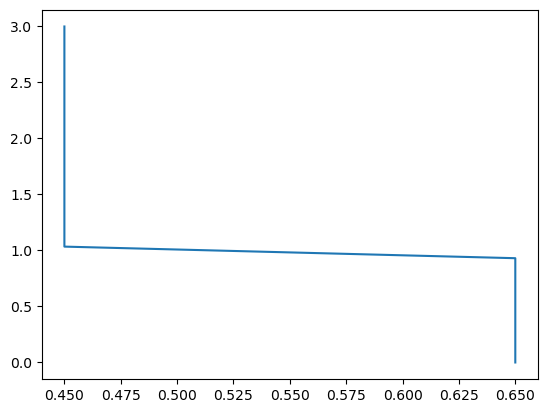

In [36]:
# initialize distribution of ground ice content
nb_distr = np.ones(30)
idz = 10
nb_distr[:int(idz)] = 0.65  # set nb close to surface (nb_max)
nb_distr[int(idz):] = 0.45  # set nb at greater depth (nb_min)
nb_matrix = np.tile(nb_distr, (5, 1))

plt.plot(nb_distr, z)